In [1]:
# 앙상블(Ensemble)
# 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법

# 앙상블의 기법
# 1. 배깅(Bagging)
# Boostrap Aggregation, 샘플을 여러번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregation)하는 방법

# 2. 부스팅(Boosting)
# 가중치를 활용하여 약 분류기를 강 분류기로 만드는 방법

# 랜덤 포레스트(Random Forest)
# 여러 결정 트리의 묶음

# 랜덤 포레스트 프로세스
# 1. 결정 트리들을 생성 / 트리 생성에 무작위성 주입
# 2. 각 트리가 고유하게 만들어지도록 무작위 선택 - Bootstrap Sample
# 3. 기존 트리와 달리 무작위로 선택 후 후보들 중 최선의 테스트 도출

# max_features : 무작위로 선택할 Feature의 개수
# 이 값을 올리면 각 tree들이 매우 비슷해지고 가장 두드러진 특성을 이용하게 되어 데이터에 잘 맞춰집니다.
# 이 값을 낮추면 각 tree들은 많이 달라지고 각 tree들은 데이터에 맞추기 위해 tree의 깊이가 깊어집니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
 iris = load_iris()

In [4]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
X = iris.data
y = iris.target

In [13]:
df = pd.DataFrame(X, columns = iris.feature_names)

In [14]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf = RandomForestClassifier(n_estimators=100)
# Random forest 안에 만들어지는 의사결정 트리의 개수

In [21]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn import metrics

In [24]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9333333333333333


In [25]:
feature_imp = pd.Series(clf.feature_importances_, index= iris.feature_names).sort_values(ascending=False)

In [26]:
feature_imp

petal width (cm)     0.474235
petal length (cm)    0.392060
sepal length (cm)    0.101159
sepal width (cm)     0.032547
dtype: float64

In [27]:
import matplotlib.pyplot as plt

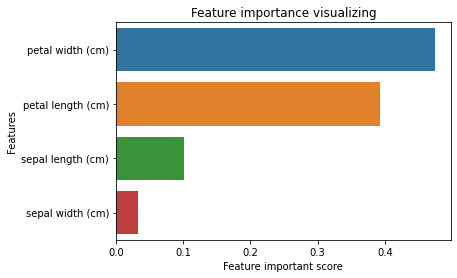

In [30]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature important score')
plt.ylabel('Features')
plt.title('Feature importance visualizing')
plt.show()